In [1]:
import numpy as np
from sdm_ml.dataset import BBSDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from sparse_gp.kernels.rbf_kernel import RBFKernel
from sparse_gp.likelihoods.bernoulli_logit_likelihood import BernoulliLogitLikelihood
from sparse_gp.inference.laplace_inference import LaplaceInference

In [2]:
csv_folder = '../../../multi_species/bbs/dataset/csv_bird_data/'
dataset = BBSDataset(csv_folder)

In [3]:
training_set = dataset.get_training_set()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

covariates_full = training_set['covariates'].values
outcomes = training_set['outcomes'][['American Crow', 'Brown-headed Cowbird']]

scaler = StandardScaler()

# Keep only the first 200 rows and 2 outcomes for this test
covariates = scaler.fit_transform(covariates_full.astype(np.float32)[:200, :])
outcomes = outcomes.values[:200, 0].astype(float)

In [5]:
kernel = RBFKernel(np.arange(covariates.shape[1]))

In [6]:
likelihood = BernoulliLogitLikelihood()

In [7]:
inference = LaplaceInference(kernel, likelihood)

In [8]:
inference.fit(covariates, outcomes)

     fun: 55.22109989758805
     jac: array([ 0.00063805,  0.00056529, -0.00447952, -0.00370291,  0.00588727,
        0.00331221, -0.00159042,  0.00922646, -0.0078964 ])
 message: 'Optimization terminated successfully.'
    nfev: 53
     nit: 32
    njev: 53
  status: 0
 success: True
       x: array([2.71934962, 6.17584739, 2.06532122, 9.74848662, 2.67853921,
       8.32516672, 9.94526163, 2.7878744 , 7.1242395 ])

In [9]:
inference.kernel.lengthscales

array([2.71934962, 6.17584739, 2.06532122, 9.74848662, 2.67853921,
       8.32516672, 9.94526163, 2.7878744 ])

In [10]:
inference.kernel.stdev

7.124239503362569

In [11]:
to_predict = scaler.transform(covariates_full[400:800, :])

to_predict.shape

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(400, 8)

In [12]:
means, vars = inference.predict(to_predict)
means.shape, vars.shape

((400,), (400,))

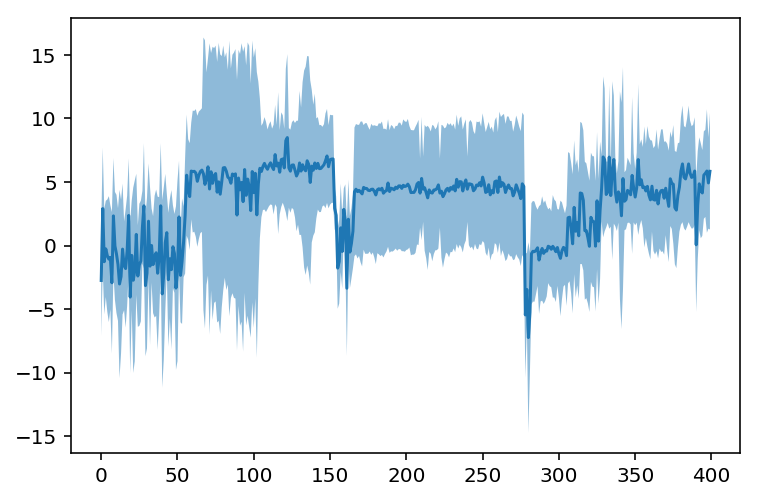

In [13]:
plt.plot(means)
plt.fill_between(np.arange(means.shape[0]), means - 2*np.sqrt(vars), means + 2*np.sqrt(vars), alpha=0.5)

In [34]:
samples = np.random.multivariate_normal(mean=means, cov=np.diag(vars), size=1000)

In [36]:
from scipy.special import expit

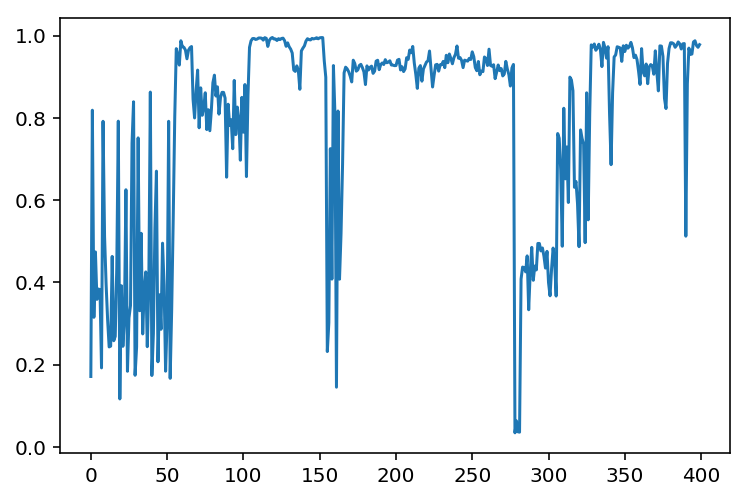

In [38]:
plt.plot(np.mean(expit(samples), axis=0))